<a href="https://colab.research.google.com/github/OfTheByteQuest/Data-Analytics-Learning-and-Projects/blob/main/Chapter-4/Chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/OfTheByteQuest/Data-Analytics-Learning-and-Projects.git

%cd Data-Analytics-Learning-and-Projects

!git config --global user.email "harshrathore9910@gmail.com"
!git config --global user.name "OfTheByteQuest"

Cloning into 'Data-Analytics-Learning-and-Projects'...
remote: Enumerating objects: 144, done.
remote: Counting objects: 100% (144/144), done.
remote: Compressing objects: 100% (128/128), done.
remote: Total 144 (delta 30), reused 53 (delta 3), pack-reused 0 (from 0)
Receiving objects: 100% (144/144), 3.60 MiB | 5.11 MiB/s, done.
Resolving deltas: 100% (30/30), done.
/content/Data-Analytics-Learning-and-Projects


In [ ]:
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = 'all'

In [2]:
from matplotlib_inline.backend_inline import set_matplotlib_formats, select_figure_formats
from IPython import get_ipython

set_matplotlib_formats('retina')
select_figure_formats(shell=get_ipython(), formats="svg")

# Aggrgating Pandas DataFrames

In [3]:
# Importing mandatory lib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Querying and Merging DataFrames

In [ ]:
weather =  pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv")
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01T00:00:00,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01T00:00:00,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01T00:00:00,SNOW,GHCND:US1NJBG0017,",,N,",0.0


In [ ]:
snow_data = weather.query('datatype == "SNOW" and value > 0')
snow_data.head(), snow_data.shape

(                    date datatype            station attributes  value
 114  2018-01-01T00:00:00     SNOW  GHCND:US1NYWC0019       ,,N,   25.0
 699  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0015       ,,N,  229.0
 702  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0017       ,,N,   10.0
 706  2018-01-04T00:00:00     SNOW  GHCND:US1NJBG0018       ,,N,   46.0
 713  2018-01-04T00:00:00     SNOW  GHCND:US1NJES0018       ,,N,   10.0,
 (639, 5))

In [ ]:
station_info = pd.read_csv("/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/weather_stations.csv")
station_info.head(), station_info.shape

(                  id                           name   latitude  longitude  \
 0  GHCND:US1CTFR0022        STAMFORD 2.6 SSW, CT US  41.064100 -73.577000   
 1  GHCND:US1CTFR0039          STAMFORD 4.2 S, CT US  41.037788 -73.568176   
 2  GHCND:US1NJBG0001      BERGENFIELD 0.3 SW, NJ US  40.921298 -74.001983   
 3  GHCND:US1NJBG0002  SADDLE BROOK TWP 0.6 E, NJ US  40.902694 -74.083358   
 4  GHCND:US1NJBG0003           TENAFLY 1.3 W, NJ US  40.914670 -73.977500   
 
    elevation  
 0       36.6  
 1        6.4  
 2       20.1  
 3       16.8  
 4       21.6  ,
 (279, 5))

In [ ]:
station_info.id.describe()

,id
count,279
unique,279
top,GHCND:USW00094789
freq,1


In [ ]:
weather.station.describe()

,station
count,78780
unique,110
top,GHCND:USW00094789
freq,4270


In [ ]:
def get_row_count(*dfs):
  return [df.shape[0] for df in dfs]

In [ ]:
get_row_count(station_info, weather)

[279, 78780]

In [ ]:
def get_info(attr: str, *dfs):
  return list(map(lambda df: getattr(df, attr), dfs))

In [ ]:
get_info('shape', station_info, weather)

[(279, 5), (78780, 5)]

#### Merge or Join in Pandas

The `merge()` method in pandas allows you to combine two DataFrames based on one or more common columns or indices, similar to SQL-style joins. This function is essential for integrating datasets and aligning data for analysis.

**Key Parameters of `merge()`:**

- **`right`**: The DataFrame to merge with the caller.
- **`how`**: Specifies the type of merge to perform:
  - `'left'`: All rows from the left DataFrame and matching rows from the right.
  - `'right'`: All rows from the right DataFrame and matching rows from the left.
  - `'outer'`: All rows from both DataFrames, with `NaN` where there are no matches.
  - `'inner'`: Only rows with matching keys in both DataFrames.
  - `'cross'`: Cartesian product of both DataFrames.
- **`on`**: Column or index level names to join on. If not specified, and other join keys are not provided, it defaults to the intersection of the columns in both DataFrames.
- **`left_on`** and **`right_on`**: Specific columns or index levels from the left and right DataFrames to join on.
- **`left_index`** and **`right_index`**: If `True`, use the index (row labels) from the left or right DataFrame as the join key(s).
- **`suffixes`**: A tuple of string suffixes to apply to overlapping column names in the left and right side, respectively.

**Examples:**

1. **Inner Join on a Common Column:**

   ```python
   import pandas as pd

   df1 = pd.DataFrame({
       'ID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [1, 2, 4],
       'Age': [24, 27, 22]
   })

   merged_df = pd.merge(df1, df2, on='ID', how='inner')
   print(merged_df)
   ```


   **Output:**

   ```
      ID    Name  Age
   0   1   Alice   24
   1   2     Bob   27
   ```


   This merges the two DataFrames on the 'ID' column, including only rows with matching 'ID' values.

2. **Left Join with Different Column Names:**

   ```python
   df1 = pd.DataFrame({
       'EmployeeID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [1, 2, 4],
       'Age': [24, 27, 22]
   })

   merged_df = pd.merge(df1, df2, left_on='EmployeeID', right_on='ID', how='left')
   print(merged_df)
   ```


   **Output:**

   ```
      EmployeeID     Name   ID   Age
   0           1    Alice  1.0  24.0
   1           2      Bob  2.0  27.0
   2           3  Charlie  NaN   NaN
   ```


   Here, the merge is performed where 'EmployeeID' from `df1` matches 'ID' from `df2`. Rows in `df1` without a corresponding 'ID' in `df2` have `NaN` for 'ID' and 'Age'.

3. **Outer Join:**

   ```python
   df1 = pd.DataFrame({
       'ID': [1, 2, 3],
       'Name': ['Alice', 'Bob', 'Charlie']
   })

   df2 = pd.DataFrame({
       'ID': [2, 3, 4],
       'Age': [30, 25, 22]
   })

   merged_df = pd.merge(df1, df2, on='ID', how='outer', suffixes=('_left', '_right'))
   print(merged_df)
   ```


   **Output:**

   ```
      ID     Name  Age
   0   1    Alice  NaN
   1   2      Bob  30.0
   2   3  Charlie  25.0
   3   4      NaN  22.0
   ```


   This outer join includes all rows from both DataFrames, with `NaN` where there are no matches.

**Considerations:**

- When merging on columns with the same name, specify the `on` parameter. If the column names differ, use `left_on` and `right_on`.
- Use the `suffixes` parameter to distinguish overlapping column names from the left and right DataFrames.
- Be mindful of the `how` parameter to control the type of join, as it determines which rows are included in the resulting DataFrame.

For more detailed information, refer to the [pandas documentation on merging](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

***Explanation:*** Since, from previous outputs we know that there are in total 279 unique stations for which we have data in *stations* dataframe for which we have data, but, in *weather* dataframe only, 110 of them appears so, by performing the inner join on them, we will get a dataframe in which only info of all the stations for which we have info will be present along with other info in the *weather* dataframe.

In [ ]:
# Inner_join dataframe contains all the rows which have common values of
# station in both the dataframes. Since, weather dataframe has multiple values
# the values of columns in the station dataframe, will be repeated for the
# rows where the 'key' values matches.


inner_join = weather.merge(
    station_info, left_on = 'station', right_on = 'id', how='inner'
)
inner_join.sample(5, random_state=0), inner_join.shape

(                      date datatype            station attributes  value  \
 10739  2018-02-17T00:00:00     PRCP  GHCND:USC00066655   ,,7,0700    4.1   
 45188  2018-07-27T00:00:00     SNOW  GHCND:US1NJES0019       ,,N,    0.0   
 59823  2018-10-05T00:00:00     PRCP  GHCND:US1NJES0024       ,,N,    0.0   
 10852  2018-02-17T00:00:00     TMIN  GHCND:USW00094789   ,,W,2400   -2.1   
 46755  2018-08-03T00:00:00     AWND  GHCND:USW00094745       ,,W,    1.8   
 
                       id                              name   latitude  \
 10739  GHCND:USC00066655                PUTNAM LAKE, CT US  41.082500   
 45188  GHCND:US1NJES0019   WEST CALDWELL TWP 1.3 NE, NJ US  40.861500   
 59823  GHCND:US1NJES0024      CEDAR GROVE TWP 0.4 W, NJ US  40.855695   
 10852  GHCND:USW00094789  JFK INTERNATIONAL AIRPORT, NY US  40.639150   
 46755  GHCND:USW00094745     WESTCHESTER CO AIRPORT, NY US  41.062360   
 
        longitude  elevation  
 10739 -73.638600       91.4  
 45188 -74.277500       81.4

In [ ]:
# To produce the same result as the last one.
weather.merge(
    station_info.rename({'id':'station'}, axis=1),
    on='station',
    how='inner'
).sample(
    5, random_state=0
)

,date,datatype,station,attributes,value,name,latitude,longitude,elevation
10739,2018-02-17T00:00:00,PRCP,GHCND:USC00066655,",,7,0700",4.1,"PUTNAM LAKE, CT US",41.082500,-73.638600,91.4
45188,2018-07-27T00:00:00,SNOW,GHCND:US1NJES0019,",,N,",0.0,"WEST CALDWELL TWP 1.3 NE, NJ US",40.861500,-74.277500,81.4
59823,2018-10-05T00:00:00,PRCP,GHCND:US1NJES0024,",,N,",0.0,"CEDAR GROVE TWP 0.4 W, NJ US",40.855695,-74.235564,108.5
10852,2018-02-17T00:00:00,TMIN,GHCND:USW00094789,",,W,2400",-2.1,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4
46755,2018-08-03T00:00:00,AWND,GHCND:USW00094745,",,W,",1.8,"WESTCHESTER CO AIRPORT, NY US",41.062360,-73.704630,111.9


In [ ]:
left_join = station_info.merge(
    weather,
    left_on = 'id',
    right_on = 'station',
    how = 'left'
)

right_join = weather.merge(
    station_info,
    left_on = 'station',
    right_on = 'id',
    how = 'right'
)

outer_join = weather.merge(
    station_info[station_info.name.str.contains('NY')],
    left_on='station',
    right_on='id',
    how='outer',
    indicator=True
)

***Explanation:*** The difference in counts of rows in inner_join dataframe and left_join, right_join and outer_join dataframes as, inner join only contains rows where values of 'id' and 'station' columns matched whereas, that's not the
case in the other datafrmes. Also, since, left_join and right_join, dataframes contains rows of all the values of 'station' columns but, not of 'id' columns, outer_join dataframe have more rows in it.

In [ ]:
get_info("shape", inner_join, left_join, right_join, outer_join)

[(78780, 10), (78949, 10), (78949, 10), (78852, 11)]

In [ ]:
pd.concat([outer_join.sample(4, random_state=0),
          outer_join[outer_join.station.isna()].head(2)], axis=0)

,date,datatype,station,attributes,value,id,name,latitude,longitude,elevation,_merge
74838,2018-01-23T00:00:00,AWND,GHCND:USW00094789,",,W,",6.3,GHCND:USW00094789,"JFK INTERNATIONAL AIRPORT, NY US",40.639150,-73.764010,3.4,both
19325,2018-03-29T00:00:00,SNOW,GHCND:US1NJPS0012,",,N,",0.0,NaN,NaN,NaN,NaN,NaN,left_only
66828,2018-08-09T00:00:00,WT01,GHCND:USW00094728,",,W,",1.0,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,both
67039,2018-08-28T00:00:00,WSF2,GHCND:USW00094728,",,W,",5.4,GHCND:USW00094728,"NY CITY CENTRAL PARK, NY US",40.778980,-73.969250,42.7,both
14527,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJMS0036,"PARSIPPANY TROY HILLS TWP 2.1 E, NJ US",40.865600,-74.385100,64.3,right_only
14528,NaN,NaN,NaN,NaN,NaN,GHCND:US1NJMS0039,"PARSIPPANY TROY HILLS TWP 1.3 WSW, NJ US",40.853314,-74.446957,94.2,right_only


In [ ]:
dirty_data = pd.read_csv(
    filepath_or_buffer = "/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/dirty_data.csv",
    index_col = 'date'
).drop_duplicates().drop(columns='SNWD')

In [ ]:
dirty_data.head()
dirty_data.shape
dirty_data.station.value_counts()
dirty_data.index.nunique()

,station,PRCP,SNOW,TMAX,TMIN,TOBS,WESF,inclement_weather
date,,,,,,,,
2018-01-01T00:00:00,?,0.0,0.0,5505.0,-40.0,NaN,NaN,NaN
2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-8.3,-16.1,-12.2,NaN,False
2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-4.4,-13.9,-13.3,NaN,False
2018-01-04T00:00:00,?,20.6,229.0,5505.0,-40.0,NaN,19.3,True
2018-01-05T00:00:00,?,0.3,NaN,5505.0,-40.0,NaN,NaN,NaN


(309, 8)

,count
station,
GHCND:USC00280907,247
?,62


259

In [ ]:
valid_station = dirty_data.query(
    'station != "?"'
).copy().drop(columns=['WESF', 'station'])
station_with_wesf = dirty_data.query(
    'station == "?"'
).copy().drop(columns=['station', 'TOBS', 'TMIN', 'TMAX'])

In [ ]:
resultant_df = valid_station.merge(
    station_with_wesf,
    left_index = True,
    right_index = True,
    how='inner',
    suffixes=('', '_?')
)
resultant_df.query('WESF > 0').head()
resultant_df.shape

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


(50, 10)

In [ ]:
# To produce the same result as the last one using `.join() method`
valid_station.join(
    station_with_wesf,
    rsuffix = "_?"
).query('WESF > 0').head()

,PRCP,SNOW,TMAX,TMIN,TOBS,inclement_weather,PRCP_?,SNOW_?,WESF,inclement_weather_?
date,,,,,,,,,,
2018-01-30T00:00:00,0.0,0.0,6.7,-1.7,-0.6,False,1.5,13.0,1.8,True
2018-03-08T00:00:00,48.8,NaN,1.1,-0.6,1.1,False,28.4,NaN,28.7,NaN
2018-03-13T00:00:00,4.1,51.0,5.6,-3.9,0.0,True,3.0,13.0,3.0,True
2018-03-21T00:00:00,0.0,0.0,2.8,-2.8,0.6,False,6.6,114.0,8.6,True
2018-04-02T00:00:00,9.1,127.0,12.8,-1.1,-1.1,True,14.0,152.0,15.2,True


***Note:*** The `.join()` method always uses index column to join dataframes but, can use any column from the right dataframe if provided as the value of `on` parameter.

#### Set Operations

In [ ]:
weather.set_index('station', inplace=True)
station_info.set_index('id', inplace=True)

weather.index.intersection(station_info.index)

Index(['GHCND:US1CTFR0039', 'GHCND:US1NJBG0015', 'GHCND:US1NJBG0017',
       'GHCND:US1NJBG0018', 'GHCND:US1NJBG0023', 'GHCND:US1NJBG0030',
       'GHCND:US1NJBG0039', 'GHCND:US1NJBG0044', 'GHCND:US1NJES0018',
       'GHCND:US1NJES0024',
       ...
       'GHCND:US1NJBG0037', 'GHCND:USC00284987', 'GHCND:US1NJES0031',
       'GHCND:US1NJES0029', 'GHCND:US1NJMD0086', 'GHCND:US1NJMS0097',
       'GHCND:US1NJMN0081', 'GHCND:US1NJMD0088', 'GHCND:US1NJES0040',
       'GHCND:US1NYQN0029'],
      dtype='object', length=110)

In [ ]:
weather.index.difference(station_info.index)

RangeIndex(start=0, stop=279, step=1)

In [ ]:
station_info.index.difference(weather.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1NJBG0001', 'GHCND:US1NJBG0002',
       'GHCND:US1NJBG0005', 'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008',
       'GHCND:US1NJBG0011', 'GHCND:US1NJBG0012', 'GHCND:US1NJBG0013',
       'GHCND:US1NJBG0020',
       ...
       'GHCND:USC00308322', 'GHCND:USC00308749', 'GHCND:USC00308946',
       'GHCND:USC00309117', 'GHCND:USC00309270', 'GHCND:USC00309400',
       'GHCND:USC00309466', 'GHCND:USC00309576', 'GHCND:USW00014708',
       'GHCND:USW00014786'],
      dtype='object', length=169)

In [ ]:
weather.index.unique().union(station_info.index)

Index(['GHCND:US1CTFR0022', 'GHCND:US1CTFR0039', 'GHCND:US1NJBG0001',
       'GHCND:US1NJBG0002', 'GHCND:US1NJBG0003', 'GHCND:US1NJBG0005',
       'GHCND:US1NJBG0006', 'GHCND:US1NJBG0008', 'GHCND:US1NJBG0010',
       'GHCND:US1NJBG0011',
       ...
       'GHCND:USW00014708', 'GHCND:USW00014732', 'GHCND:USW00014734',
       'GHCND:USW00014786', 'GHCND:USW00054743', 'GHCND:USW00054787',
       'GHCND:USW00094728', 'GHCND:USW00094741', 'GHCND:USW00094745',
       'GHCND:USW00094789'],
      dtype='object', length=279)

### DataFrame Operations

In [4]:
!head -n 1 '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv'
!head -n 1 '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv'

date,datatype,station,attributes,value
date,open,high,low,close,volume


In [5]:
weather = pd.read_csv(
    '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/nyc_weather_2018.csv',
    parse_dates = ['date']
)

fb = pd.read_csv(
    '/content/Data-Analytics-Learning-and-Projects/Chapter-4/Data/fb_2018.csv',
    index_col='date',
    parse_dates = True
)

#### Airthmatic and Statistics

##### Pandas Airthmatic functions

Pandas provide several method to perform airthmatic operations on `DataFrames` and `Series` objects, like `.sub()` or `div()` methods. These operations can be performed with the use of mathematical operators and with the ability of `numpy` to vecotrize these operations and broadcating, they might produce the same effects with certain differes which being:

###### **1. Handling of Different Indexes (Alignment)**  
- Pandas arithmetic methods like `.add()`, `.sub()`, `.div()`, etc., **automatically align indexes** before performing operations.  
- Arithmetic operators (`+`, `-`, `*`, `/`) do not align indexes, which may lead to mismatched computations or NaN values.  

**Example:**  
```python
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])
print(s1 - s2)  # Automatic index alignment
```
**Output:**  
```
a    NaN
b   18.0
c   28.0
d    NaN
dtype: float64
```
If using NumPy, the operation would ignore indexes and only perform element-wise subtraction.

---

###### **2. Handling Missing Values (`fill_value` Parameter)**  
- Pandas methods provide a `fill_value` parameter to replace NaNs before computation.  
- Arithmetic operators will propagate NaN values, leading to missing results.  

**Example:**  
```python
s1 = pd.Series([10, 20, 30], index=['a', 'b', 'c'])
s2 = pd.Series([1, 2, 3], index=['b', 'c', 'd'])
print(s1.sub(s2, fill_value=0))  # Replaces NaN with 0
```
**Output:**  
```
a   10.0  # s1['a'] - 0 (fill value)
b   18.0  # s1['b'] - s2['b']
c   28.0  # s1['c'] - s2['c']
d   -3.0  # 0 (fill value) - s2['d']
dtype: float64
```
Using `-` directly would result in NaN for unmatched indexes.

---

###### **3. Operations Between Different Data Structures**  
- Using arithmetic operators on DataFrames and Series can sometimes lead to broadcasting issues.  
- Pandas arithmetic methods allow explicit row-wise or column-wise operations using the `axis` parameter.  

**Example (Row-wise Operation with Series):**  
```python
df = pd.DataFrame({'A': [10, 20, 30], 'B': [40, 50, 60]})
s = pd.Series([1, 2, 3])  # No column labels
print(df.sub(s, axis=0))  # Explicit row-wise broadcasting
```
**Output:**  
```
    A   B
0   9  39
1  18  48
2  27  57
```
Arithmetic operators do not explicitly specify how broadcasting should happen.

---

###### **4. Readability and Maintainability**  
- Using `df.sub()`, `df.div()`, etc., makes the **operation’s intent clearer**.  
- It avoids confusion when dealing with different data structures and handling NaNs.  

**Comparison:**  
```python
df1.sub(df2, fill_value=0)  # Clearly handles missing values
df1 - df2  # Less explicit handling of missing values
```

---

###### **Comparison Table**  

| Feature | Arithmetic Operators (`+`, `-`, `*`, `/`) | Pandas Methods (`add()`, `sub()`, `div()`, etc.) |
|---------|--------------------------------|--------------------------------|
| **Index Alignment** | No automatic alignment | Auto-aligned by index |
| **Handling NaN Values** | NaNs propagate | `fill_value` avoids NaNs |
| **Operations on Different Shapes** | Can cause mismatches | Allows explicit broadcasting (`axis` parameter) |
| **Readability & Maintainability** | Less explicit | More explicit intent |

---

#### **When to Use Each Approach**  
- **Arithmetic operators:** When working with fully aligned Pandas objects or NumPy arrays.  
- **Pandas arithmetic methods:** When dealing with missing values, misaligned indexes, or requiring explicit broadcasting.

In [6]:
fb.head(2)

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.55,181.42,18151903
2018-01-03,181.88,184.78,181.33,184.67,16886563


In [7]:
fb.assign(
    abs_z_score_volume = lambda x: x.volume.sub(
        x.volume.mean()
    ).div(x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


In [8]:
# To produce the same response as the lat one

fb.assign(
    abs_z_score_volume = lambda x: ((x.volume - x.volume.mean())/x.volume.std()).abs()
).query('abs_z_score_volume > 3')

,open,high,low,close,volume,abs_z_score_volume
date,,,,,,
2018-03-19,177.01,177.17,170.06,172.56,88140060,3.145078
2018-03-20,167.47,170.20,161.95,168.15,129851768,5.315169
2018-03-21,164.80,173.40,163.30,169.39,106598834,4.105413
2018-03-26,160.82,161.10,149.02,160.06,126116634,5.120845
2018-07-26,174.89,180.13,173.75,176.26,169803668,7.393705


##### **Axes in Pandas and NumPy**

###### **1. Introduction to Axes**
In both **Pandas** and **NumPy**, the `axis` parameter is a fundamental concept that dictates how operations are applied across data structures. It determines whether an operation is performed along rows or columns in **DataFrames**, **Series**, and **NumPy arrays**.

The concept of axes is essential for functions such as **sum(), mean(), apply(), drop(), concatenate(), and many more**.

---

###### **2. Understanding `axis=0` vs. `axis=1`**

**In Pandas (DataFrame and Series)**

| `axis` Value | Direction | Operation Applies To | Examples |
|-------------|----------|---------------------|----------|
| `axis=0` | **Vertical** | Operates on columns (affects rows) | Sum of each column, dropping rows, applying functions column-wise |
| `axis=1` | **Horizontal** | Operates on rows (affects columns) | Sum of each row, dropping columns, applying functions row-wise |

 **In NumPy (Arrays and Matrices)**

| `axis` Value | Direction | Operation Applies To | Examples |
|-------------|----------|---------------------|----------|
| `axis=0` | **Downward** | Column-wise operations | Summing along columns, finding max along columns |
| `axis=1` | **Across** | Row-wise operations | Summing along rows, finding max along rows |

---

###### **3. Axis in Pandas**

**(a) Using `axis` with the `drop()` method**

```python
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
})

# Drop row at index 1
df_dropped_row = df.drop(1, axis=0)

# Drop column 'B'
df_dropped_column = df.drop('B', axis=1)
```

**(b) Using `axis` with aggregation functions (e.g., `sum()`)**

```python
# Sum along columns (column-wise sum)
df_sum_col = df.sum(axis=0)

# Sum along rows (row-wise sum)
df_sum_row = df.sum(axis=1)
```

**(c) Using `axis` with `apply()` for custom functions**

```python
# Find max in each column
df_max_col = df.apply(max, axis=0)

# Find max in each row
df_max_row = df.apply(max, axis=1)
```

**(d) Using `axis` in element-wise operations**

```python
s = pd.Series([10, 20, 30])

# Subtract Series from DataFrame row-wise (index alignment)
df_subtract_row = df.sub(s, axis=0)

# Subtract Series from DataFrame column-wise (broadcasting)
df_subtract_col = df.sub(s, axis=1)
```

---

###### **4. Axis in NumPy**

**(a) Using `axis` with NumPy Arrays**

```python
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])

# Sum along columns (downward)
sum_col = np.sum(arr, axis=0)

# Sum along rows (across)
sum_row = np.sum(arr, axis=1)
```

**(b) Using `axis` with NumPy's `mean()` and `max()`**

```python
mean_col = np.mean(arr, axis=0)  # Mean of each column
max_row = np.max(arr, axis=1)    # Max of each row
```

---

###### **5. Axis in Concatenation and Stacking**

**(a) In Pandas (`concat()` method)**

```python
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5, 6], 'B': [7, 8]})

# Concatenating along rows (adding rows, column names remain the same)
df_concat_row = pd.concat([df1, df2], axis=0)

# Concatenating along columns (adding new columns)
df_concat_col = pd.concat([df1, df2], axis=1)
```

**(b) In NumPy (`concatenate()` function)**

```python
arr1 = np.array([[1, 2], [3, 4]])
arr2 = np.array([[5, 6], [7, 8]])

# Stack arrays vertically (rows added)
arr_stack_vert = np.concatenate((arr1, arr2), axis=0)

# Stack arrays horizontally (columns added)
arr_stack_horiz = np.concatenate((arr1, arr2), axis=1)
```

---

###### **6. Summary and Best Practices**

| Use Case | Pandas | NumPy |
|----------|--------|--------|
| **Summing values** | `df.sum(axis=0)` | `np.sum(arr, axis=0)` |
| **Dropping rows/columns** | `df.drop(..., axis=0/1)` | Not applicable |
| **Applying functions** | `df.apply(func, axis=0/1)` | `np.apply_along_axis(func, axis, arr)` |
| **Arithmetic operations** | `df.sub(s, axis=0/1)` | Element-wise broadcasting |
| **Concatenation** | `pd.concat([df1, df2], axis=0/1)` | `np.concatenate((arr1, arr2), axis=0/1)` |

###### **Best Practices:**
- Use `axis=0` when you want to **apply operations on each column (affecting rows)**.
- Use `axis=1` when you want to **apply operations on each row (affecting columns)**.
- Always check **data alignment** when performing operations across different structures.

Understanding axes helps in optimizing operations and writing efficient Pandas and NumPy code.



##### Understanding the Rank Concept in Pandas

###### Basic Definition
In pandas, the `rank()` function assigns a rank to each value in a Series or DataFrame column based on the value's relative position when arranged in order (ascending by default). Ranking works on the values themselves, not on the indexes.

###### Example Explained
Consider this example:

```python
import pandas as pd
s = pd.Series([3, 1, 4, 1, 5, 9, 2])
s.sort_values()
print(s.rank())  # Default ranking
```

This produces:
```
0    4.0
1    1.5
2    5.0
3    1.5
4    6.0
5    7.0
6    3.0
dtype: float64
```

###### Step-by-Step Explanation

1. Original Series: `[3, 1, 4, 1, 5, 9, 2]` with indexes `[0, 1, 2, 3, 4, 5, 6]`

2. When sorted: `[1, 1, 2, 3, 4, 5, 9]`

3. Rank assignment:
   - Value 3 (at index 0) → 4th smallest value → rank 4.0
   - Value 1 (at index 1) → tied for 1st/2nd smallest → average rank 1.5
   - Value 4 (at index 2) → 5th smallest value → rank 5.0
   - Value 1 (at index 3) → tied for 1st/2nd smallest → average rank 1.5
   - Value 5 (at index 4) → 6th smallest value → rank 6.0
   - Value 9 (at index 5) → 7th smallest value → rank 7.0
   - Value 2 (at index 6) → 3rd smallest value → rank 3.0

4. The output shows each original index with the rank of the value that was at that position.

###### Key Features of Rank()

1. **Tie Handling Methods**:
   - `'average'` (default): Assigns the average of the ranks to tied values
   - `'min'`: Assigns the lowest rank to all tied values
   - `'max'`: Assigns the highest rank to all tied values
   - `'first'`: Ranks assigned based on the order the values appear
   - `'dense'`: Like 'min' but with no gaps between ranks

2. **Float Output**: Ranks are returned as floats to accommodate tie-breaking strategies like 'average'

3. **Direction**: Can rank in ascending (`ascending=True`, default) or descending order (`ascending=False`)

###### Practical Applications

1. **Non-parametric Statistics**: For tests that don't assume normal distribution (Spearman correlation, Mann-Whitney, etc.)

2. **Outlier Resistance**: Rankings are immune to extreme values that might skew analyses

3. **Normalization**: Puts different datasets on a comparable scale

4. **Percentiles and Quantiles**: Foundation for understanding relative positioning of values

5. **Competition Scoring**: Many contests use ranks rather than absolute scores

###### Real-World Example

When comparing metrics across different scales (e.g., salaries across countries with different currencies), ranking can provide a meaningful way to understand relative standing regardless of the original units.

###### Common Pattern in Output

Remember that in the output:
- Left side: Original position (index) in the Series
- Right side: Rank assigned to the value that was at that position

This format sometimes creates confusion since it appears as though the ranks are assigned to indexes, when they're actually computed based on the values. But, pandas may be using this format of giving the output as, <mark>the index values will align with the original index of the dataframe when they are being added as a new column for analyses.</mark>

***Explanation:*** It can be observed that the largest percentage change in volume traded was on January 12, 2018, which was the day, Meta announced that changes to the news feed section, which was to prioritize content from user's friends over brands they follow. Since, most of the Meta's revenue comes from advertising, approximately 99% (as of Dec 31, 2023), this caused panic resulting people to sell it's stocks driving the volume traded to the highest till, Decenmber 31, 2018.

In [9]:
fb.assign(
    volume_pct_change = fb.volume.pct_change(),
    pct_change_rank = lambda x: x.volume_pct_change.abs().rank(ascending=False)
).nsmallest(5, 'pct_change_rank')

,open,high,low,close,volume,volume_pct_change,pct_change_rank
date,,,,,,,
2018-01-12,178.06,181.48,177.40,179.37,77551299,7.087876,1.0
2018-03-19,177.01,177.17,170.06,172.56,88140060,2.611789,2.0
2018-07-26,174.89,180.13,173.75,176.26,169803668,1.628841,3.0
2018-09-21,166.64,167.25,162.81,162.93,45994800,1.428956,4.0
2018-03-26,160.82,161.10,149.02,160.06,126116634,1.352496,5.0


In [10]:
# pd.Series.rank

In [11]:
fb['2018-01-11':'2018-01-12']

,open,high,low,close,volume
date,,,,,
2018-01-11,188.40,188.40,187.38,187.77,9588587
2018-01-12,178.06,181.48,177.40,179.37,77551299


##### Difference between `.any()` and `.all()` method

**1. `.any()`**

`.any()` method looks in the mask, whether atleast one of the values, along the methioned axis, has `True` value. So, until none of the values along the mentioned axis has `True` value, it will give us `True`. Only if, all the values are `False`, along the axis, it will give us `False`. For, `axis = 0` (`default`), it will check divisions along the horizontal axis, which are columns, and give us the results for each column individually whereas, for `axis=1`, the checking happens along the vertical axis, and thus all the rows are examined individually.

**2. `.all()`**

`.all()` methods, in-opposite to `.any()` method, check for the presence of `True` for all the cells, along the mentioned axis and returns `True` only if, all of the cells have `True` value. Functionality, through, `axis` parameter is manipulated in the same manner as it is done in, `.any()` method.

In [12]:
# To check whether any column has value less than 215
(fb > 215).any()
(fb > 215).all()

,0
open,False
high,False
low,False
close,False
volume,True


In [13]:
# pd.Series.any
# pd.Series.all

## Binning and thresholds

In [14]:
# Confirming whether any two days have the same volume traded

(fb.volume.value_counts() > 1).sum()

np.int64(0)

In [15]:
# Creating bins for volume traded
fb.volume.describe()['count']
fb.volume.max()
fb.volume.min()
fb.volume.max()-fb.volume.min()

160215081

In [16]:
from scipy import stats

In [17]:
# stats.gaussian_kde
# np.histogram_bin_edges()

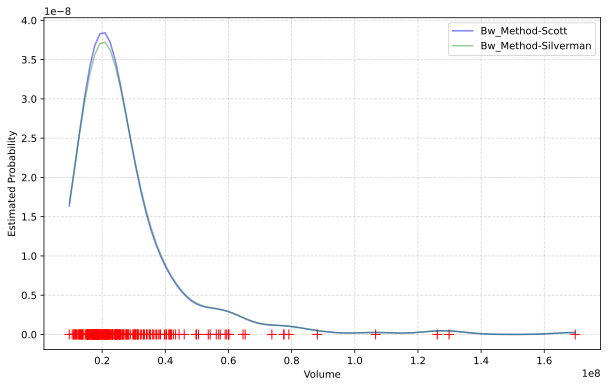

In [18]:
# Inspecting the distribution of 'volume' to get an idea of its distribution

# Testing the result for bandwidths with calculated from different formulas.
kde_scott_volume = stats.gaussian_kde(fb.volume,)
kde_silverman_volume = stats.gaussian_kde(fb.volume, bw_method='silverman')

plt.figure(figsize=(10, 6))
plt.plot(fb.volume, np.zeros(fb.volume.shape), 'r+', ms=10)
plt.plot(np.linspace(fb.volume.min(), fb.volume.max(), 100), kde_scott_volume(np.linspace(fb.volume.min(), fb.volume.max(), 100)), color='blue', alpha=0.5, label="Bw_Method-Scott")
plt.plot(np.linspace(fb.volume.min(), fb.volume.max(), 100), kde_silverman_volume(np.linspace(fb.volume.min(), fb.volume.max(), 100)), color='green', alpha=0.4, label="Bw_Method-Silverman")
plt.xlabel("Volume")
plt.ylabel("Estimated Probability")
plt.grid(alpha=0.5, linestyle="--")
plt.legend()

In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr'  # Or use 'last_expr'


***Note:*** The `hist()` method of `matplotlib` is based on  `numpy`'s `histogram_bin_edges()` function so, the values for `bins` parameter that work for `histogram_bins_edges()` function, works for `hist()` function too.

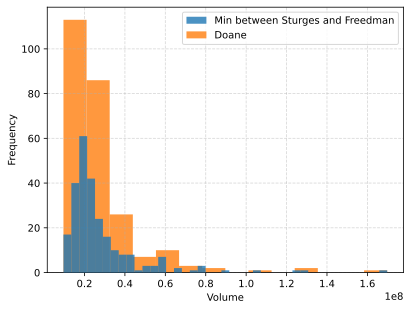

In [20]:
# Calculating the bin sizes with different formulas for bin count

volume_bin_edges_auto = np.histogram_bin_edges(fb.volume, bins='auto')
volume_bin_edges_doane = np.histogram_bin_edges(fb.volume, bins='doane')
plt.hist(fb.volume, volume_bin_edges_auto, alpha=0.8, label='Min between Sturges and Freedman', zorder=10)
plt.hist(fb.volume, volume_bin_edges_doane, alpha=0.8, label='Doane')
plt.legend()
plt.grid(alpha=0.5,linestyle='--')
plt.xlabel("Volume")
plt.ylabel("Frequency")
plt.show()

In [21]:
# pd.cut

In [22]:
# Code for binning based on my analysis- Not used further

# volume_binned = pd.cut(
#     fb.volume,
#     bins=volume_bin_edges_auto,
#     # retbins=True
# )
# volume_binned.to_frame().assign(
#     bin_rank = lambda x: x.rank(method='max')
# )

volume_binned = pd.cut(
    fb.volume,
    bins=3,
    labels=['low', 'med', 'high']
)

volume_binned.value_counts()

,count
volume,
low,240
med,8
high,3


In [23]:
fb[volume_binned == 'high'].sort_values('volume', ascending=False)

,open,high,low,close,volume
date,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668
2018-03-20,167.47,170.20,161.95,168.15,129851768
2018-03-26,160.82,161.10,149.02,160.06,126116634


***Explanation:*** The results obtained below are replication of crash in Meta's stocks which was depicted earlier.

In [24]:
fb.loc['2018-07-25': '2018-07-26']

,open,high,low,close,volume
date,,,,,
2018-07-25,215.715,218.62,214.27,217.50,64592585
2018-07-26,174.890,180.13,173.75,176.26,169803668


***Explanation:*** High volume trading of the Meta's stock within the days, March 16, 2018 to March 20, 2018 is the result of another scandal which was revealed regarding Meta. The news broke out on March 16, 2018 which was Friday and it's only after when it opened again on Monday the difference in volume traded occured which continued till later on when more info about the scandal was out. The scandal was *Cambridge Analytica Scandal*.

In [25]:
fb.loc["2018-03-16": "2018-03-20"]

,open,high,low,close,volume
date,,,,,
2018-03-16,184.49,185.33,183.41,185.09,24403438
2018-03-19,177.01,177.17,170.06,172.56,88140060
2018-03-20,167.47,170.20,161.95,168.15,129851768


In [26]:
fb.loc["2018-03-16": "2018-03-20"].index.day_name()

Index(['Friday', 'Monday', 'Tuesday'], dtype='object', name='date')

In [27]:
volume_qbinned = pd.qcut(
    fb.volume,
    q=4,
    labels=['q1', 'q2', 'q3', 'q4']
)

volume_qbinned.value_counts(
)

,count
volume,
q1,63
q2,63
q4,63
q3,62


In [28]:
weather.head()

,date,datatype,station,attributes,value
0,2018-01-01,PRCP,GHCND:US1CTFR0039,",,N,",0.0
1,2018-01-01,PRCP,GHCND:US1NJBG0015,",,N,",0.0
2,2018-01-01,SNOW,GHCND:US1NJBG0015,",,N,",0.0
3,2018-01-01,PRCP,GHCND:US1NJBG0017,",,N,",0.0
4,2018-01-01,SNOW,GHCND:US1NJBG0017,",,N,",0.0


***Explanation:*** In the following case we are interested in _bucketting_ the values of `SNOW` column of the weather dataframe which will tell us whether snowfall happened in the sliced dataframe or not. For our case, we are interested in just examining the Central Park.

In [29]:
central_park_weather = weather.query(
    "station == 'GHCND:USW00094728'"
).pivot(index='date', columns='datatype', values='value')
central_park_weather.head()

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT06,WT08
date,,,,,,,,,,,,,,,
2018-01-01,3.5,0.0,0.0,0.0,-7.1,-13.8,300.0,300.0,6.7,11.2,NaN,NaN,NaN,NaN,NaN
2018-01-02,3.6,0.0,0.0,0.0,-3.2,-10.5,260.0,250.0,7.2,12.5,NaN,NaN,NaN,NaN,NaN
2018-01-03,1.4,0.0,0.0,0.0,-1.0,-8.8,260.0,270.0,6.3,9.8,NaN,NaN,NaN,NaN,NaN
2018-01-04,5.6,19.3,249.0,30.0,-1.6,-7.1,310.0,310.0,10.7,19.2,1.0,1.0,NaN,NaN,1.0
2018-01-05,5.8,0.0,0.0,180.0,-7.1,-12.7,280.0,280.0,9.4,15.7,NaN,NaN,NaN,NaN,NaN


In [30]:
# pd.Series.clip

In [31]:
central_park_weather.SNOW.nunique(), central_park_weather.SNOW.value_counts()

(12,
 SNOW
 0.0      354
 249.0      1
 10.0       1
 3.0        1
 23.0       1
 13.0       1
 112.0      1
 81.0       1
 208.0      1
 5.0        1
 140.0      1
 163.0      1
 Name: count, dtype: int64)

In [32]:
central_park_weather.SNOW.clip(0,1).value_counts()

,count
SNOW,
0.0,354
1.0,11


## Applying functions

***Explanation:***
In the given code below, we are trying to calcualte the z-score accross columns for a specific month. <mark>It's important that while dealing time series data which behave differently for different sections, within the repeatition of certain time period, here it's seasonality as, the entire cycle repeats over a year and conditions vary w.r.t seasons, we observe z-score for that section differently.</mark> That's why we are seperating the data here and over the specific month of Cotober and not a seasons is just for convinience.

In [33]:
oct_weather_z_scores = central_park_weather.loc["2018-10",['TMIN', 'TMAX', 'PRCP']
].apply(lambda x: x.sub(x.mean()).div(x.std()))
oct_weather_z_scores.describe().T

,count,mean,std,min,25%,50%,75%,max
datatype,,,,,,,,
TMIN,31.0,-1.790682e-16,1.0,-1.339112,-0.751019,-0.474269,1.065152,1.843511
TMAX,31.0,1.951844e-16,1.0,-1.305582,-0.870013,-0.138258,1.011643,1.604016
PRCP,31.0,1.038596e-16,1.0,-0.394438,-0.394438,-0.394438,-0.240253,3.936167


***Explanation:*** It ca be oberserved that for the month of Ocotober the deviation in temperatures is not much from the rest of the October, as can be observed by observing the quartiles. But, for precipation we can clearly see a jump from the third quartile, -0.24025278300391484 to the max value, 3.936166657279261 which can be observed in the subsequent box-plo too.

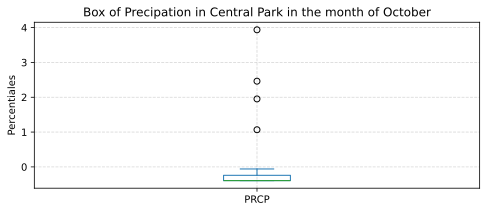

In [34]:
oct_weather_z_scores.PRCP.plot(kind='box',figsize=(8,3),
                               ylabel="Percentiales",
                               title="Box of Precipation in Central Park in the month of October",)
plt.grid(alpha=0.5, linestyle='--')


In [35]:
oct_weather_z_scores.query('PRCP > 3')

datatype,TMIN,TMAX,PRCP
date,,,
2018-10-27,-0.751019,-1.201045,3.936167


In [36]:
central_park_weather.loc["2018-10", 'PRCP'].describe()

,PRCP
count,31.000000
mean,2.941935
std,7.458542
min,0.000000
25%,0.000000
50%,0.000000
75%,1.150000
max,32.300000


In [37]:
# pd.DataFrame.map
# np.vectorize

###### Applying methods on windows of values

`.rolling()` method allows to apply a function on the values of a window, at a time. There are few considerations which are needed to known before applying it, which being:

1. by default, `.rolling()` methods includes the value of the row (of the specific column on which it is being applied) while applying the function and is only modified by using the `closed` parameter. For instance in the output below it can be oberserved in the third cell in the *rolling_PRCP* column that the it contains the sum of last two values along with it i.e., 0.0 + 17.5 + 0.0 = 17.5. Also,
2. by default, the window is not centered around the current observation.

Further observations can be made through this example:
```python
# Re-import necessary libraries after execution state reset
import pandas as pd
import numpy as np

# Create a sample time series DataFrame
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Value': [10, 15, 18, 20, 30, 25, 27, 35, 40, 50]}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Apply rolling mean with a window of 3
df['Rolling_Mean'] = df['Value'].rolling(window=3).mean()

# Apply rolling sum with min_periods=1
df['Rolling_Sum'] = df['Value'].rolling(window=3, min_periods=1).sum()

# Apply weighted rolling mean with a Gaussian window
df['Weighted_Mean'] = df['Value'].rolling(window=3, win_type='gaussian').mean(std=1)

# Apply centered rolling mean
df['Rolling_Centered'] = df['Value'].rolling(window=3, center=True).mean()

# Display the DataFrame with results
df
```
```
Result
            Value  Rolling_Mean  Rolling_Sum  Weighted_Mean  Rolling_Centered
Date                                                                         
2023-01-01     10           NaN         10.0            NaN               NaN
2023-01-02     15           NaN         25.0            NaN         14.333333
2023-01-03     18     14.333333         43.0      14.451863         17.666667
2023-01-04     20     17.666667         53.0      17.725931         22.666667
2023-01-05     30     22.666667         68.0      22.192549         25.000000
2023-01-06     25     25.000000         75.0      25.888971         27.333333
2023-01-07     27     27.333333         82.0      26.918480         29.000000
2023-01-08     35     29.000000         87.0      28.644412         34.000000
2023-01-09     40     34.000000        102.0      34.177794         41.666667
2023-01-10     50     41.666667        125.0      41.370343     
```

In [38]:
central_park_weather.loc['2018-10'].assign(
    rolling_PRCP = lambda x: x.PRCP.rolling('3D').sum()
)[['PRCP', 'rolling_PRCP']].head(7).T

date,2018-10-01,2018-10-02,2018-10-03,2018-10-04,2018-10-05,2018-10-06,2018-10-07
datatype,,,,,,,
PRCP,0.0,17.5,0.0,1.0,0.0,0.0,0.0
rolling_PRCP,0.0,17.5,17.5,18.5,1.0,1.0,0.0


In [39]:
# pd.Series.rolling

In [41]:
central_park_weather.loc["2018-10"].rolling('3D')\
.mean().head().iloc[:,:6]

datatype,AWND,PRCP,SNOW,SNWD,TMAX,TMIN
date,,,,,,
2018-10-01,0.900000,0.000000,0.0,0.0,24.400000,17.200000
2018-10-02,0.900000,8.750000,0.0,0.0,24.700000,17.750000
2018-10-03,0.966667,5.833333,0.0,0.0,24.233333,17.566667
2018-10-04,0.800000,6.166667,0.0,0.0,24.233333,17.200000
2018-10-05,1.033333,0.333333,0.0,0.0,23.133333,16.300000


In [42]:
central_park_weather["2018-10-01":"2018-10-07"].rolling('3D').agg(
    {'TMAX':'max', 'TMIN':'min', 'AWND':'mean', 'PRCP':'sum'}
).join(central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
       lsuffix='_rolling_3D'
).sort_index(axis=1)

datatype,AWND,AWND_rolling_3D,PRCP,PRCP_rolling_3D,TMAX,TMAX_rolling_3D,TMIN,TMIN_rolling_3D
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,25.0,18.3,17.2
2018-10-03,1.1,0.966667,0.0,17.5,23.3,25.0,17.2,17.2
2018-10-04,0.4,0.800000,1.0,18.5,24.4,25.0,16.1,16.1
2018-10-05,1.6,1.033333,0.0,1.0,21.7,24.4,15.6,15.6
2018-10-06,0.5,0.833333,0.0,1.0,20.0,24.4,17.2,15.6
2018-10-07,1.1,1.066667,0.0,0.0,26.1,26.1,19.4,15.6


###### Expanding

Expanding is done to get the cummulative result of a function up to the current value. In difference to rolling which gives us the result of a window of values which continues to shift by one value, `.expanding()` method allows us to get the output of the function till the current cell. The `.agg()` method which was used above to specify the function to be applied, through rolling, to each column, can be used with `.expanding()` method also.

***Note:*** `.agg()` method can also accept numpy functions.

In [43]:
central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
    {
        'TMAX': np.min,
        'TMIN': np.max,
        'AWND': np.mean,
        'PRCP': np.sum
    }
).join(
    central_park_weather[['TMAX', 'TMIN', 'AWND', 'PRCP']],
    lsuffix='_expanding'
).sort_index(axis=1)

<ipython-input-43-814ab61465ed>:1: FutureWarning: The provided callable <function min at 0x7a495ed9cae0> is currently using Expanding.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
<ipython-input-43-814ab61465ed>:1: FutureWarning: The provided callable <function max at 0x7a495ed9c9a0> is currently using Expanding.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  central_park_weather['2018-10-01':'2018-10-07'].expanding().agg(
<ipython-input-43-814ab61465ed>:1: FutureWarning: The provided callable <function mean at 0x7a495ed9d3a0> is currently using Expanding.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  central_park_weather['2018-10-01':'2018-10-07'].

datatype,AWND,AWND_expanding,PRCP,PRCP_expanding,TMAX,TMAX_expanding,TMIN,TMIN_expanding
date,,,,,,,,
2018-10-01,0.9,0.900000,0.0,0.0,24.4,24.4,17.2,17.2
2018-10-02,0.9,0.900000,17.5,17.5,25.0,24.4,18.3,18.3
2018-10-03,1.1,0.966667,0.0,17.5,23.3,23.3,17.2,18.3
2018-10-04,0.4,0.825000,1.0,18.5,24.4,23.3,16.1,18.3
2018-10-05,1.6,0.980000,0.0,18.5,21.7,21.7,15.6,18.3
2018-10-06,0.5,0.900000,0.0,18.5,20.0,20.0,17.2,18.3
2018-10-07,1.1,0.928571,0.0,18.5,26.1,20.0,19.4,19.4


***Note:*** The warnings above explain that when we pass, `np.min` or any other function as such in the `.agg()` while expanding, Pandas is using internal methods such as, `Expanding.min()` internally but, it will change in future and Pandas will switch to, `np.` functions which can be used through string-names such as, `"min"` so, to safegouard our code we should stick to that, what we will do henceforth.